In [1]:
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from xgboost import plot_importance
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
import pandas as pd
import numpy as np
import itertools
import time

In [2]:
challenge_set_df = pd.read_csv('../../data/encoded_challenge_set.csv')
#display(challenge_set_df)
#display(challenge_set_df.describe())
#display(challenge_set_df.info())

In [3]:
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))
    
def test_model(data_df, features_columns, target_column, n):
    features = data_df[features_columns]
    target = data_df[target_column]
    X_array = features.values
    y_array = target.values
    mse_scores = []
    kf = KFold(n_splits=3, shuffle=True, random_state=42)
    for train_index, test_index in kf.split(X_array):
        X_train, X_test = features.iloc[train_index], features.iloc[test_index]
        y_train, y_test = target.iloc[train_index], target.iloc[test_index]
        #model = xgb.XGBRegressor(objective='reg:squarederror', eval_metric='rmse')
        model = KNeighborsRegressor(n_neighbors=n)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse_scores.append(rmse(y_test, y_pred))
    return np.mean(mse_scores)

def scale_data(dataframe, features, scale_type):
    result_df = dataframe.copy()
    if scale_type == "Normalization":
        scaler = MinMaxScaler(feature_range=(0, 1))
    elif scale_type == "Standardization":
        scaler = StandardScaler()
    result_df[features] = scaler.fit_transform(result_df[features])
    return result_df

In [4]:
feature_columns = [
    'month-day', 'month', 'day_in_month', 'adep', 'country_code_adep', 'ades', 'country_code_ades', 'aircraft_type',
    'wtc', 'airline', 'flight_duration', 'taxiout_time', 'flown_distance', 'actual_offblock_time_hour', 'actual_offblock_time_minute',
    'actual_offblock_time_hour_minute', 'arrival_time_hour', 'arrival_time_minute', 'arrival_time_hour_minute', 'latitude_median', 
    'longitude_median', 'altitude_mean', 'groundspeed_mean', 'track_mean', 'vertical_rate_mean', 'track_unwrapped_mean', 'u_component_of_wind_mean', 
    'v_component_of_wind_mean', 'temperature_mean', 'specific_humidity_mean'
]

feature_columns = [
    'month-day', 'month', 'day_in_month', 'adep', 'country_code_adep', 'ades', 'country_code_ades', 'aircraft_type',
    'wtc', 'airline', 'flight_duration', 'taxiout_time', 'flown_distance', 'actual_offblock_time_hour', 'actual_offblock_time_minute',
    'actual_offblock_time_hour_minute', 'arrival_time_hour', 'arrival_time_minute', 'arrival_time_hour_minute'
]

target_column = 'tow'

df = challenge_set_df[feature_columns + [target_column]]
#display(df)
#display(df.describe())
#display(df.info())

In [5]:
normalized_df = scale_data(dataframe=df, features=feature_columns, scale_type="Normalization")
#display(normalized_df)
#display(normalized_df.describe())
#display(normalized_df.info())

In [6]:
standardized_df = scale_data(dataframe=df, features=feature_columns, scale_type="Standardization")
#display(standardized_df)
#display(standardized_df.describe().round())
#display(standardized_df.info())

KNN with Normalization
n = 1


C:\Users\MOHAMMEDG\Anaconda3\envs\prc\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\MOHAMMEDG\Anaconda3\envs\prc\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


rmse_score = 9542.174884865412
Execution time: 129.10056972503662 seconds

n = 2
rmse_score = 8548.650932308681
Execution time: 139.13833475112915 seconds

n = 3
rmse_score = 8277.415254238866
Execution time: 140.87728023529053 seconds

n = 4
rmse_score = 8219.39652872981
Execution time: 141.11426711082458 seconds

n = 5
rmse_score = 8207.934188597848
Execution time: 140.34295988082886 seconds

n = 6
rmse_score = 8223.588717174773
Execution time: 140.4253270626068 seconds

n = 7
rmse_score = 8256.897976718734
Execution time: 139.3944809436798 seconds

n = 8
rmse_score = 8311.202968174945
Execution time: 139.77681708335876 seconds

n = 9
rmse_score = 8374.86285669401
Execution time: 139.14969420433044 seconds

n = 10
rmse_score = 8419.8717898521
Execution time: 138.96837902069092 seconds



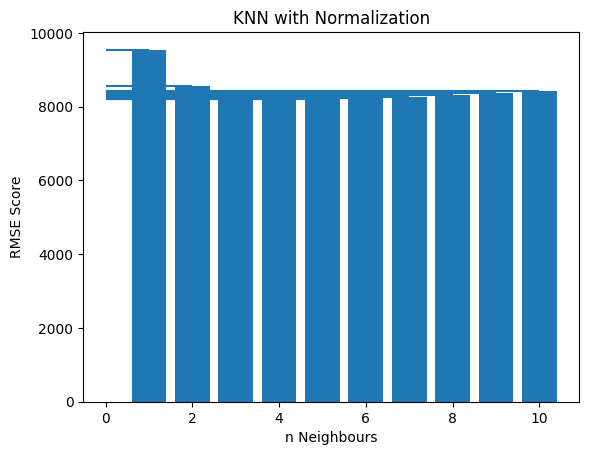

In [7]:
print("KNN with Normalization")
n_s = list(range(1, 11, 1))
normalized_rmse_scores = []
for n in n_s:
    print(f"{n = }")
    start_time = time.time()
    rmse_score = test_model(normalized_df, feature_columns, target_column, n)
    normalized_rmse_scores.append(rmse_score)
    print(f"{rmse_score = }")
    print(f"Execution time: {time.time() - start_time} seconds")
    print()

plt.bar(n_s, normalized_rmse_scores, align='center')
plt.title('KNN with Normalization')
plt.xlabel('n Neighbours')
plt.ylabel('RMSE Score')
for i in range(len(normalized_rmse_scores)):
    plt.hlines(normalized_rmse_scores[i], 0, n_s[i])
plt.show()

KNN with Standarization
n = 1
rmse_score = 8955.534460265557
Execution time: 128.68510627746582 seconds

n = 2
rmse_score = 8033.001826710592
Execution time: 141.12066841125488 seconds

n = 3
rmse_score = 7809.959302066108
Execution time: 142.23178553581238 seconds

n = 4
rmse_score = 7727.740588677475
Execution time: 342.00367522239685 seconds

n = 5
rmse_score = 7731.543217502255
Execution time: 743.5617473125458 seconds

n = 6
rmse_score = 7761.158098719684
Execution time: 773.1558902263641 seconds

n = 7
rmse_score = 7807.276956203746
Execution time: 769.230554819107 seconds

n = 8
rmse_score = 7854.8967062187185
Execution time: 750.7890746593475 seconds

n = 9
rmse_score = 7900.687513175276
Execution time: 756.2081482410431 seconds

n = 10
rmse_score = 7950.6335329684625
Execution time: 749.9560408592224 seconds



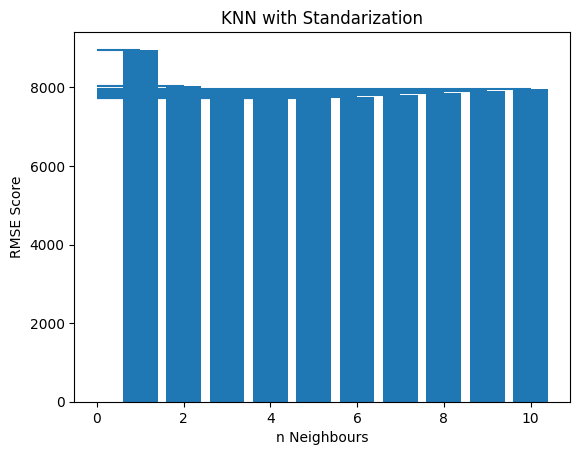

In [8]:
print("KNN with Standarization")
n_s = list(range(1, 11, 1))
standardized_rmse_scores = []
for n in n_s:
    print(f"{n = }")
    start_time = time.time()
    rmse_score = test_model(standardized_df, feature_columns, target_column, n)
    standardized_rmse_scores.append(rmse_score)
    print(f"{rmse_score = }")
    print(f"Execution time: {time.time() - start_time} seconds")
    print()

plt.bar(n_s, standardized_rmse_scores, align='center')
plt.title('KNN with Standarization')
plt.xlabel('n Neighbours')
plt.ylabel('RMSE Score')
for i in range(len(standardized_rmse_scores)):
    plt.hlines(standardized_rmse_scores[i], 0, n_s[i])
plt.show()